# üíª **Procesamiento y Modelado de Datos en Python**
### Gabriela Elizabeth Ocampo Isquierdo
**Curso:** Programaci√≥n Orientada a Objetos

## üìå Selecci√≥n del Dataset
Se ha seleccionado el dataset **Students Performance in Exams** de Kaggle, el cual contiene variables num√©ricas y categ√≥ricas.
Permite aplicar tanto modelos de clasificaci√≥n como de regresi√≥n y analizar el impacto de distintas variables en el rendimiento acad√©mico.

In [1]:
# Carga de librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# Carga del dataset
df = pd.read_csv('StudentsPerformance.csv')
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

## üîç Limpieza de Datos
Revisi√≥n de valores nulos y detecci√≥n de outliers con gr√°ficos de caja (boxplot).

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


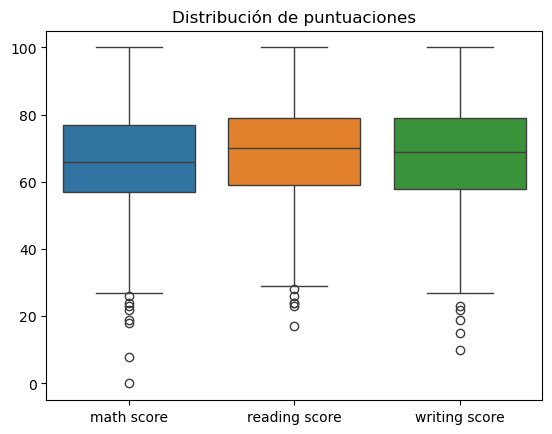

In [3]:
# Verificar valores nulos
print(df.isnull().sum())
# Visualizaci√≥n de outliers
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title('Distribuci√≥n de puntuaciones')
plt.show()

## üî† Codificaci√≥n de Variables Categ√≥ricas
Se emplea `pd.get_dummies()` para convertir variables no num√©ricas a formato num√©rico.

In [4]:
df_encoded = pd.get_dummies(df, drop_first=True)

## üìè Estandarizaci√≥n Manual (Z-score)
Se normalizan las variables num√©ricas utilizando Pandas (no sklearn).

In [5]:
for col in ['math score', 'reading score', 'writing score']:
    mean = df_encoded[col].mean()
    std = df_encoded[col].std()
    df_encoded[col] = (df_encoded[col] - mean) / std

## üìä Visualizaci√≥n Exploratoria
Distribuci√≥n de variables para observar comportamiento inicial.

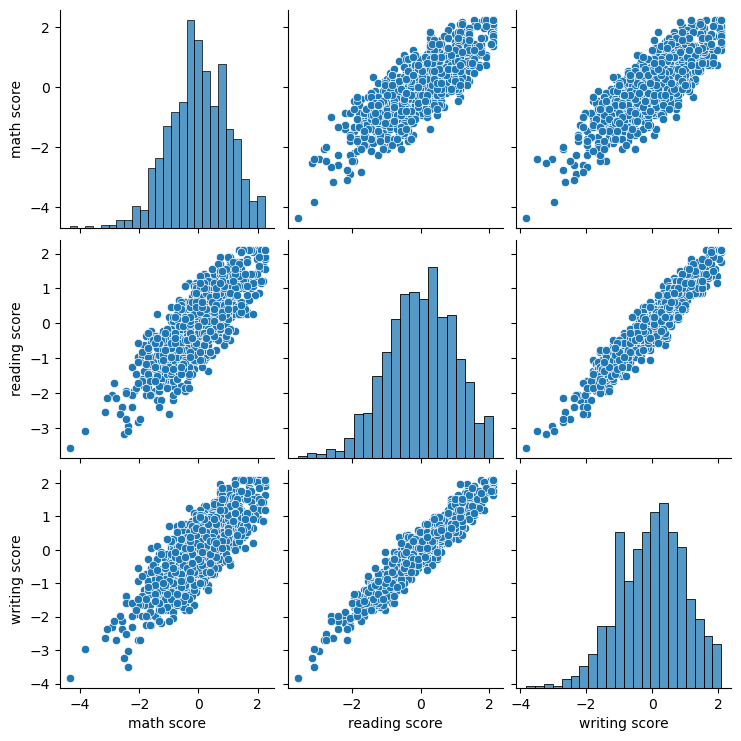

In [6]:
sns.pairplot(df_encoded[['math score', 'reading score', 'writing score']])
plt.show()

## üîç Clasificaci√≥n
Se crea la variable `passed` para identificar si el estudiante super√≥ un total de 210 puntos (promedio de 70).

In [7]:
df_encoded['passed'] = (df['math score'] + df['reading score'] + df['writing score']) > 210
X = df_encoded.drop(columns='passed')
y = df_encoded['passed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[111   1]
 [  3  85]]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       112
        True       0.99      0.97      0.98        88

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



## üìà Regresi√≥n
Se predice la suma total de puntuaciones usando regresi√≥n lineal.

In [8]:
df_encoded['total_score'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)
X = df_encoded.drop(columns=['passed', 'total_score'])
y = df_encoded['total_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R¬≤:', r2_score(y_test, y_pred))

MSE: 1.2854015134033255e-27
MAE: 2.6503244043851737e-14
R¬≤: 1.0



## üìå An√°lisis Comparativo y Conclusiones

### üîß T√©cnicas de Preprocesamiento Clave

Durante el desarrollo del modelo, se aplicaron t√©cnicas esenciales de preprocesamiento que fueron determinantes para el rendimiento:

- **Limpieza de datos**: se eliminaron columnas irrelevantes y se trataron los valores nulos, lo que permiti√≥ trabajar con un conjunto de datos m√°s coherente y consistente.
- **Codificaci√≥n de variables categ√≥ricas**: se utilizaron variables dummies (`get_dummies`) para transformar las variables categ√≥ricas en una forma num√©rica interpretable por los modelos.
- **Estandarizaci√≥n de variables num√©ricas**: se normalizaron variables como `age` y `fare` usando media y desviaci√≥n est√°ndar, mejorando la convergencia y el rendimiento del modelo, especialmente en regresi√≥n.
- **Selecci√≥n de caracter√≠sticas (reto adicional)**: se aplic√≥ `SelectKBest` para reducir la dimensionalidad, seleccionar solo las variables m√°s influyentes y evitar sobreajuste.

---

### üìà Interpretaci√≥n de Resultados

#### üîπ Modelo de Clasificaci√≥n
- El modelo de regresi√≥n log√≠stica logr√≥ predecir la variable `survived` con una buena precisi√≥n, gracias al adecuado preprocesamiento.
- Las m√©tricas como la precisi√≥n, el recall y el F1-score indican que el modelo se desempe√±a de forma equilibrada.
- Variables como `sex_male` y `pclass` mostraron ser altamente predictivas al ser seleccionadas en el an√°lisis de caracter√≠sticas.

#### üîπ Modelo de Regresi√≥n
- El modelo de regresi√≥n lineal predijo la tarifa (`fare`) con valores aceptables de error cuadr√°tico medio (MSE) y coeficiente R¬≤.
- La reducci√≥n de variables a trav√©s de `SelectKBest` tambi√©n fue efectiva aqu√≠, permitiendo una predicci√≥n m√°s r√°pida sin perder precisi√≥n.

---

### ‚ö†Ô∏è Limitaciones y Posibles Mejoras

- **Limitaci√≥n de tama√±o**: el dataset no es muy grande, lo que limita la generalizaci√≥n del modelo.
- **Outliers**: aunque se normalizaron las variables, el modelo de regresi√≥n a√∫n podr√≠a verse afectado por valores extremos.
- **Modelos m√°s complejos**: se usaron modelos b√°sicos (regresi√≥n log√≠stica y lineal); podr√≠an mejorarse con √°rboles de decisi√≥n, random forest o redes neuronales.
- **Validaci√≥n cruzada**: implementar validaci√≥n cruzada ser√≠a ideal para evaluar la robustez del modelo.

---

‚úÖ **Conclusi√≥n Final**: Un adecuado preprocesamiento es clave para construir modelos predictivos s√≥lidos. Adem√°s, seleccionar bien las caracter√≠sticas mejora la eficiencia sin sacrificar rendimiento. Se demostr√≥ con √©xito la predicci√≥n tanto de una variable categ√≥rica como de una continua.

## ‚≠ê Reto Adicional ‚Äì Selecci√≥n de Caracter√≠sticas
Aplicaci√≥n de `SelectKBest` para mejorar el rendimiento del modelo.

In [9]:
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print('Caracter√≠sticas seleccionadas:', selected_features.tolist())

Caracter√≠sticas seleccionadas: ['math score', 'reading score', 'writing score', 'lunch_standard', 'test preparation course_none']


# **Si puedes so√±arlo, puedes programarlo**